## ДОМАШНЕЕ ЗАДАНИЕ

### **Задача:** повторите Begnners-туториал на датасете **Credit Card Fraud Detection**
```
import pandas as pd
url = "https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv"
df = pd.read_csv(url)
# 284,807 транзакций, 28 анонимизированных признаков + Time + Amount
# Сильный дисбаланс (0.172% мошеннических)
```

Характеристика датасета:
- возможны выбросы и пропуски данных
- обратите внимание на баланс
- оценка precision/recall

### **Требования:**
1. **часть 1-2: анализ данных**
   - загрузите датасет `sklearn.datasets.load_iris()`
   - создайте 2 графика распределения классов
   - визуализируйте данные в 2D (выберите 2 любых признака)

2. **часть 3-5: подготовка и обучение**
   - разделите данные 70/30 с `stratify`
   - масштабируйте признаки
   - обучите SVM с линейным ядром

3. **часть 6: эксперименты**
   - попробуйте 3 разных значения C: 0.1, 1, 10
   - сравните accuracy каждой модели
   - выберите лучшую

4. **часть 7-8: оценка**
   - постройте матрицу ошибок для лучшей модели
   - вычислите precision, recall, F1-score
   - найдите и проанализируйте 2 примера ошибок

5. **часть 9: анализ**
   - постройте кривую обучения
   - ответьте: модель переобучается или недообучается?
   - что можно улучшить?

### **Формат сдачи:**
- **Colab ноутбук** с выполненным кодом
- **краткий отчет** (3-5 предложений) с выводами:
  - какая точность достигнута?
  - на каких классах чаще ошибается модель?
  - какие параметры SVM сработали лучше всего?

### **Критерии оценки:**
1. корректная загрузка и анализ данных
2. правильное разделение и масштабирование
3. обучение SVM с разными параметрами (показать, что вы делали как минимум 2 прогона с разными гиперпараметрами, 1 прогон даёт 1 балл)
4. визуализация матрицы ошибок
5. вычисление метрик precision, recall, F1
6. построение кривой обучения
7. представлены ответы на все вопросы из списка требований

### **Дедлайн:** 14 февраля, 23:59 в свои учебные репозитории

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
url = "https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv"
df = pd.read_csv(url)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Изучим данные

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
print(f'Количество нулевых значений в датасете: {df.isnull().sum().max()}')

Количество нулевых значений в датасете: 0


In [7]:
print('Настоящие транзакции составляют', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% от всех данных')
print('Мошеннические транзакции составляют', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% от всех данных')

Настоящие транзакции составляют 99.83 % от всех данных
Мошеннические транзакции составляют 0.17 % от всех данных


**Визуализируем дисбаланс**

In [71]:
df = df.rename(columns={'Class': 'target'})
y = df['target']
df['fraud_class'] = df['target'].map({0: 'not_fraud', 1: 'fraud'})

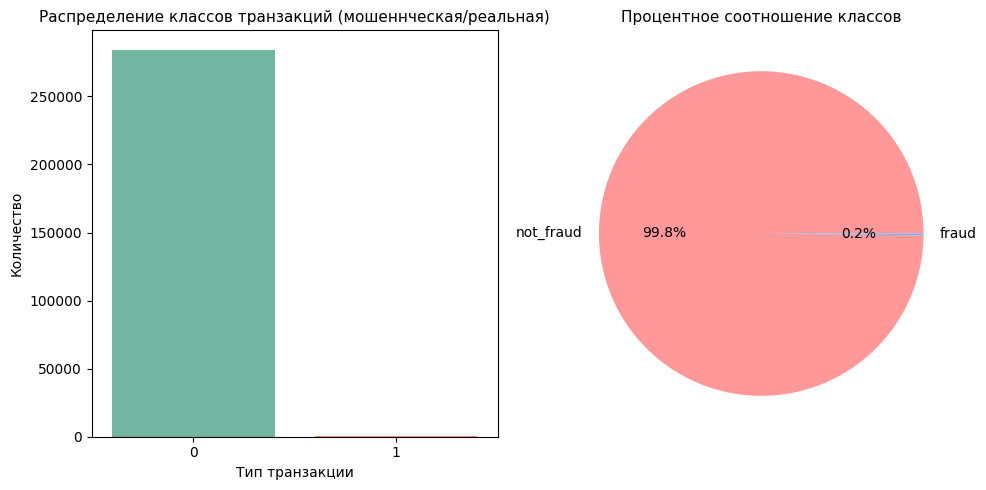

In [9]:
plt.figure(figsize=(10, 5))

# гистограмма по классам
plt.subplot(1, 2, 1)
sns.countplot(x='target', hue='target', data=df, palette='Set2', legend=False)
plt.title('Распределение классов транзакций (мошеннческая/реальная)', fontdict={'fontsize':11})
plt.xlabel('Тип транзакции')
plt.ylabel('Количество')

# круговая диаграмма
plt.subplot(1, 2, 2)
class_counts = df['target'].value_counts()
plt.pie(class_counts, labels=df['fraud_class'].unique(), autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Процентное соотношение классов', fontdict={'fontsize':11})

plt.tight_layout()
plt.show()

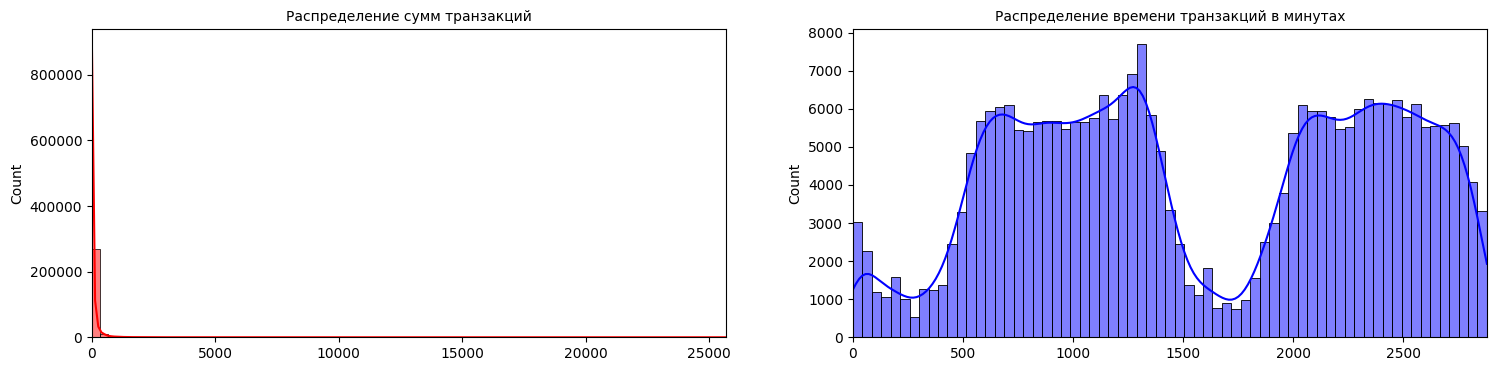

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values / 60

sns.histplot(amount_val, ax=ax[0], kde=True, bins=80, color='r')
ax[0].set_xlim([min(amount_val), max(amount_val)])
ax[0].set_title('Распределение сумм транзакций', fontsize=10)

sns.histplot(time_val, ax=ax[1], kde=True, color='b')
ax[1].set_xlim([min(time_val), max(time_val)])
ax[1].set_title('Распределение времени транзакций в минутах', fontsize=10)

plt.show()

Для сумм транзакций мы можем наблюдать сильный перекос в распределении данных, довольно много транзакций, имеющих маленькую сумму. Построим боксплоты, чтобы посмотреть на выбросы в данных более наглдядно.

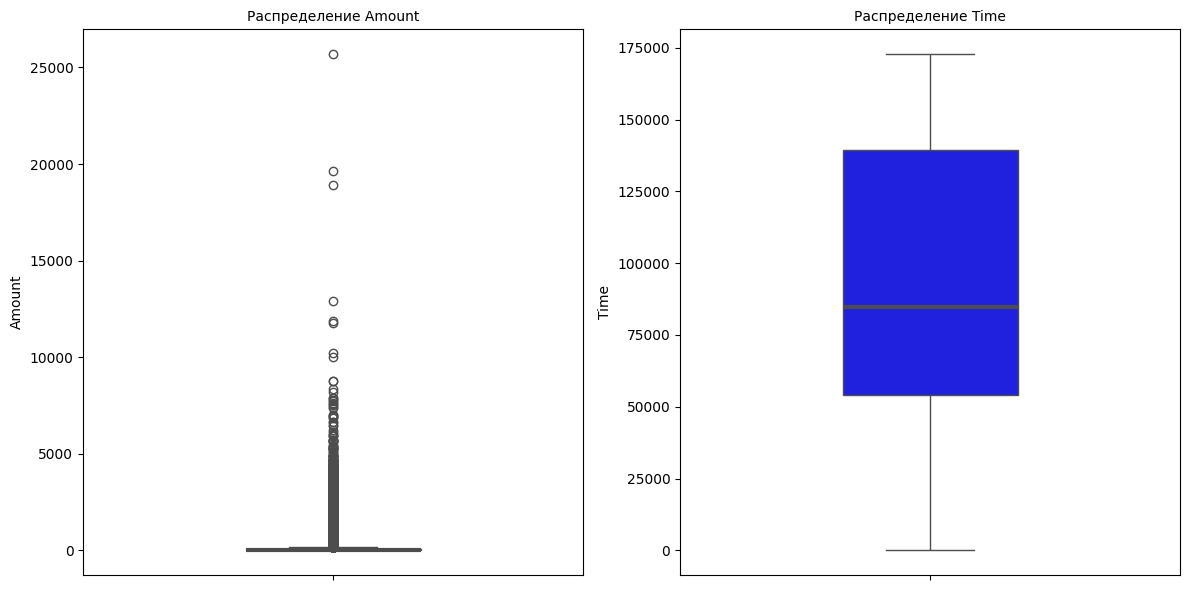

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Первый боксплот для 'Amount'
sns.boxplot(
    y=df['Amount'],
    width=0.35,
    color='r',
    medianprops={"linewidth": 3},
    ax=axes[0]
)
axes[0].set_title('Распределение Amount', fontsize=10)
axes[0].set_ylabel('Amount')

# Второй боксплот для 'Time'
sns.boxplot(
    y=df['Time'],
    width=0.35,
    color='b',
    medianprops={"linewidth": 3},
    ax=axes[1]
)
axes[1].set_title('Распределение Time', fontsize=10)
axes[1].set_ylabel('Time')

plt.tight_layout()
plt.show()

In [31]:
def get_outliers_values(data, column_name):
    """
    Возвращает DataFrame с выбросами для анализа
    """
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)].copy()
    outliers['тип_выброса'] = np.where(outliers[column_name] < lower_bound, 'ниже_границы', 'выше_границы')

    return outliers[[column_name, 'тип_выброса']]

# Получаем выбросы для Amount
amount_outliers = get_outliers_values(df, 'Amount')
print(f"\nВыбросы в Amount (первые 10):")
print(amount_outliers.head(10))
print(f"\nСтатистика по выбросам Amount:")
print(amount_outliers['тип_выброса'].value_counts())


Выбросы в Amount (первые 10):
      Amount   тип_выброса
2     378.66  выше_границы
20    231.71  выше_границы
51   1402.95  выше_границы
64    243.66  выше_границы
85    200.01  выше_границы
89   1142.02  выше_границы
134   552.18  выше_границы
140   919.60  выше_границы
142   459.39  выше_границы
147   268.78  выше_границы

Статистика по выбросам Amount:
тип_выброса
выше_границы    31904
Name: count, dtype: int64


Так и получилось, для сумм транзакций основные значения лежат в самом низу, выбросов довольно много, практически 32к.

# Дисбаланс классов

Сначала попробуем не подгонять размеры классов и удалять выбросы, оставим все признаки и посмотри, что из этого получится

In [72]:
X = df.drop(columns=[ 'target', 'fraud_class'])
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values,
                                                    test_size=0.3, stratify=y,
                                                    random_state=42)

print(f"train size: {X_train.shape}")
print(f"test size: {X_test.shape}")
print(f"train class distribution: {np.bincount(y_train)}")
print(f"test class distribution: {np.bincount(y_test)}")

train size: (199364, 30)
test size: (85443, 30)
train class distribution: [199020    344]
test class distribution: [85295   148]


In [73]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Пример до масштабирования (первые 3 признака):")
print(X_train[0, :3])
print("\nпример после масштабирования (первые 3 признака):")
print(X_train_scaled[0, :3])

Пример до масштабирования (первые 3 признака):
[1.57900000e+05 7.37887860e-02 7.95153713e-01]

пример после масштабирования (первые 3 признака):
[1.32653135 0.03767722 0.47777224]


## **Прогон с линейным ядром и 3 значениями параметра регуляризации C**

In [14]:
target_names = df['fraud_class'].unique()

svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)

# предсказания
y_pred_linear = svm_linear.predict(X_test_scaled)

# оценка
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Аcuracy линейного SVM c C=0.1: {accuracy_linear:.2%}")
print("\nClassification report:")
print(classification_report(y_test, y_pred_linear, target_names=target_names))

Аcuracy линейного SVM c C=0.1: 99.92%

Classification report:
              precision    recall  f1-score   support

   not_fraud       1.00      1.00      1.00     85295
       fraud       0.80      0.74      0.77       148

    accuracy                           1.00     85443
   macro avg       0.90      0.87      0.88     85443
weighted avg       1.00      1.00      1.00     85443



In [15]:
svm_linear_2 = SVC(C=1.0, kernel='linear', random_state=42)
svm_linear_2.fit(X_train_scaled, y_train)

# предсказания
y_pred_linear_2 = svm_linear_2.predict(X_test_scaled)

# оценка
accuracy_linear_2 = accuracy_score(y_test, y_pred_linear_2)
print(f"Аcuracy линейного SVM c C=1: {accuracy_linear_2:.2%}")
print("\nClassification report:")
print(classification_report(y_test, y_pred_linear_2, target_names=target_names))

Аcuracy линейного SVM c C=1: 99.92%

Classification report:
              precision    recall  f1-score   support

   not_fraud       1.00      1.00      1.00     85295
       fraud       0.80      0.74      0.77       148

    accuracy                           1.00     85443
   macro avg       0.90      0.87      0.88     85443
weighted avg       1.00      1.00      1.00     85443



In [16]:
svm_linear_3 = SVC(C=10.0, kernel='linear', random_state=42)
svm_linear_3.fit(X_train_scaled, y_train)

# предсказания
y_pred_linear_3 = svm_linear_3.predict(X_test_scaled)

# оценка
accuracy_linear_3 = accuracy_score(y_test, y_pred_linear_3)
print(f"Аcuracy линейного SVM c C=10: {accuracy_linear_3:.2%}")
print("\nClassification report:")
print(classification_report(y_test, y_pred_linear_3, target_names=target_names))

Аcuracy линейного SVM c C=10: 99.92%

Classification report:
              precision    recall  f1-score   support

   not_fraud       1.00      1.00      1.00     85295
       fraud       0.80      0.74      0.77       148

    accuracy                           1.00     85443
   macro avg       0.90      0.87      0.88     85443
weighted avg       1.00      1.00      1.00     85443



Вывод: заметно, что минорный класс определяется хуже, однако процент не такой низкий, учитывая наши «грязные данные». Также стоит отметить, что эксперименты с параметром не дали нам никакого прироста в метриках.

## **Прогон с RBF-ядром и разными значениями параметра регуляризации C**

C=0.01: accuracy = 99.83%
C=0.1: accuracy = 99.85%
C=1: accuracy = 99.93%
C=10: accuracy = 99.93%
C=100: accuracy = 99.93%


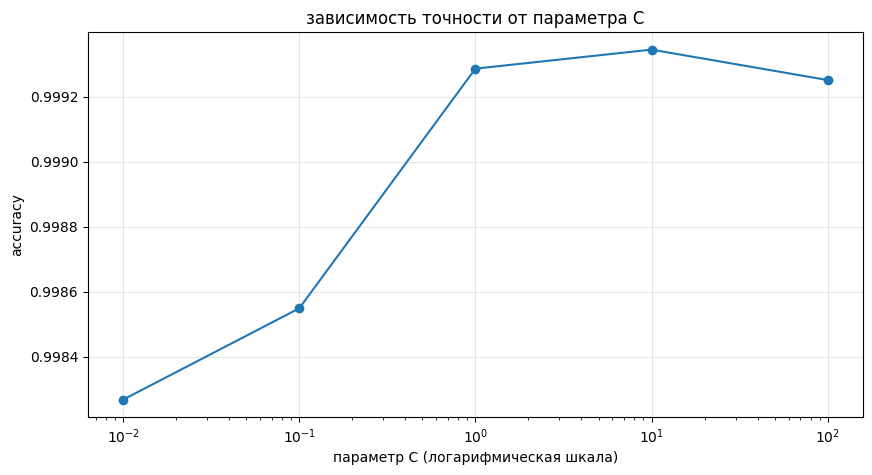

In [17]:
# пробуем разные значения C
C_values = [0.01, 0.1, 1, 10, 100]
accuracies = []

for C in C_values:
    svm_temp = SVC(kernel='rbf', C=C, random_state=42)
    svm_temp.fit(X_train_scaled, y_train)
    acc = svm_temp.score(X_test_scaled, y_test)
    accuracies.append(acc)
    print(f"C={C}: accuracy = {acc:.2%}")

# график зависимости accuracy от C
plt.figure(figsize=(10, 5))
plt.plot(C_values, accuracies, marker='o')
plt.xscale('log')
plt.xlabel('параметр C (логарифмическая шкала)')
plt.ylabel('accuracy')
plt.title('зависимость точности от параметра C')
plt.grid(True, alpha=0.3)
plt.show()

In [18]:
# используем найденные лучшие параметры
best_svm = SVC(kernel='rbf', C=10.0, gamma='scale', random_state=42)
best_svm.fit(X_train_scaled, y_train)

y_pred_best = best_svm.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"лучшая SVM accuracy: {accuracy_best:.2%}")
print("\nClassification report:")
print(classification_report(y_test, y_pred_best, target_names=target_names))

лучшая SVM accuracy: 99.93%

Classification report:
              precision    recall  f1-score   support

   not_fraud       1.00      1.00      1.00     85295
       fraud       0.97      0.64      0.77       148

    accuracy                           1.00     85443
   macro avg       0.98      0.82      0.89     85443
weighted avg       1.00      1.00      1.00     85443



Заметим, что с другим ядром у нас произошел резкий прирост для precision, но он же сбалансировался ухудшением recall, что дало нам тот же скор по f1.

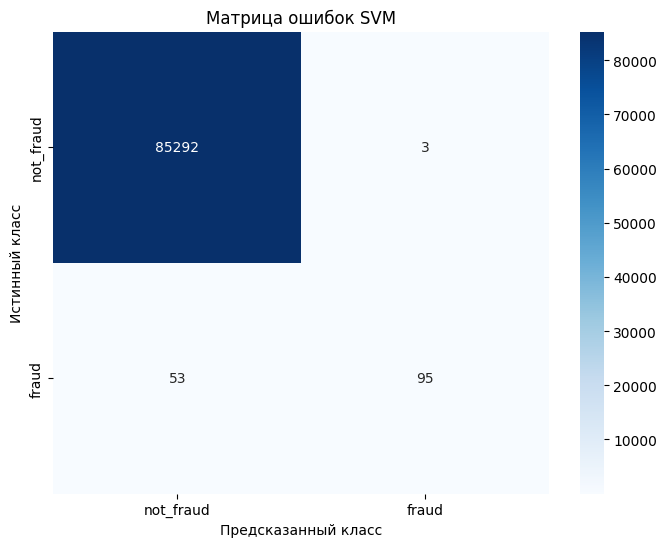

In [19]:
# вычисляем матрицу ошибок
cm = confusion_matrix(y_test, y_pred_best)

# визуализация
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок SVM')
plt.show()

In [25]:
# находим индексы ошибок
error_indices = np.where(y_pred_best != y_test)[0]

print(f"Количество ошибок: {len(error_indices)}")

if len(error_indices) > 0:
    print("\nПримеры ошибок:")

    for i, idx in enumerate(error_indices[:3]):  # покажем первые 3
        print(f"\nОшибка {i+1}:")
        print(f"  Истинный класс: {target_names[y_test[idx]]}")
        print(f"  Предсказанный:  {target_names[y_pred_best[idx]]}")
        print(f"  Вероятности классов: {best_svm.decision_function(X_test_scaled[idx:idx+1])}")

Количество ошибок: 56

Примеры ошибок:

Ошибка 1:
  Истинный класс: fraud
  Предсказанный:  not_fraud
  Вероятности классов: [-0.79500061]

Ошибка 2:
  Истинный класс: fraud
  Предсказанный:  not_fraud
  Вероятности классов: [-0.13943916]

Ошибка 3:
  Истинный класс: fraud
  Предсказанный:  not_fraud
  Вероятности классов: [-1.41534276]


Естественно ошибки совершаются в сторону большего класса, в нашем случае это плохая тенденция, так как мошеннических транзакций для примеров у нас как раз таки меньше.

In [74]:
# используем найденные лучшие параметры
best_svm = SVC(kernel='rbf', C=10.0, gamma='scale', random_state=42)
best_svm.fit(X_train_scaled, y_train)

y_pred_best = best_svm.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"лучшая SVM accuracy: {accuracy_best:.2%}")
print("\nClassification report:")
print(classification_report(y_test, y_pred_best, target_names=target_names))

лучшая SVM accuracy: 99.93%

Classification report:
              precision    recall  f1-score   support

   not_fraud       1.00      1.00      1.00     85295
       fraud       0.95      0.60      0.74       148

    accuracy                           1.00     85443
   macro avg       0.97      0.80      0.87     85443
weighted avg       1.00      1.00      1.00     85443



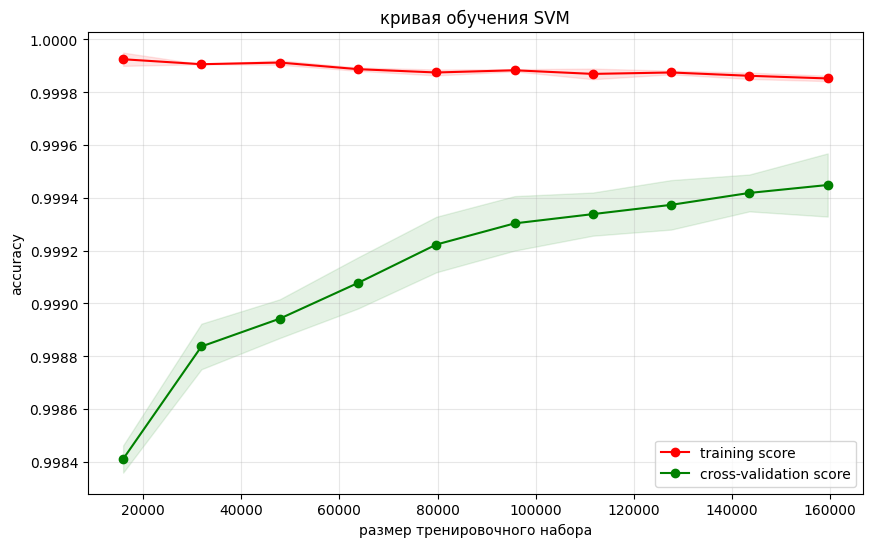

In [75]:
from sklearn.model_selection import learning_curve

# вычисляем learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_svm, X_train_scaled, y_train, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# средние значения
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# график
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='training score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
plt.xlabel('размер тренировочного набора')
plt.ylabel('accuracy')
plt.title('кривая обучения SVM')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.show()

Кривые стремятся к схождению и в данном случае мы даже не можем сказать о переобучении, так как у нас есть огромный дисбаланс классов и несколько сотен неугаданных значений никак не смогут перебороть тысячи верно определенных примеров класса `not_fraud`

# Балансировка классов

Теперь попробуем уравновесить наши классы и посмотреть, станут ли лучше метрики

In [32]:
df = df.sample(frac=1)

fraud_df = df.loc[df['target'] == 1]
non_fraud_df = df.loc[df['target'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,target,fraud_class
167597,118786.0,-0.497322,1.374390,-0.305806,0.881603,1.657570,-0.117924,1.441057,-0.052904,-0.802024,...,-0.251386,-0.605410,-0.137803,1.166951,-0.169234,0.035083,0.080336,30.56,0,not_fraud
157871,110552.0,-2.450367,2.107729,-5.140663,1.411304,-1.690780,-0.736427,-3.657946,1.944906,-0.788388,...,0.364617,0.233608,-0.282078,-0.320311,0.492920,0.359976,-0.115471,80.22,1,fraud
24674,33326.0,-0.374005,1.026813,1.288412,-0.101507,0.688799,-0.643178,0.997651,-0.425602,-0.477857,...,-0.498949,-0.099445,-0.162287,-0.497263,-0.010984,-0.183062,-0.058662,7.65,0,not_fraud
42769,41237.0,-10.281784,6.302385,-13.271718,8.925115,-9.975578,-2.832513,-12.703253,6.706846,-7.078424,...,0.366933,0.042805,0.478279,0.157771,0.329901,0.163504,-0.485552,118.30,1,fraud
149577,91502.0,0.007379,2.365183,-2.600287,1.111602,3.276441,-1.776141,2.114531,-0.830084,0.900490,...,-0.902100,-0.404382,-0.012944,0.589836,-0.734449,-0.447529,-0.362375,1.00,1,fraud


Теперь более подробно посмотрим на то, сколько у нас есть выбросов в данных, чтобы определиться, какой способмасштабирования признаков мы выберем на этот раз

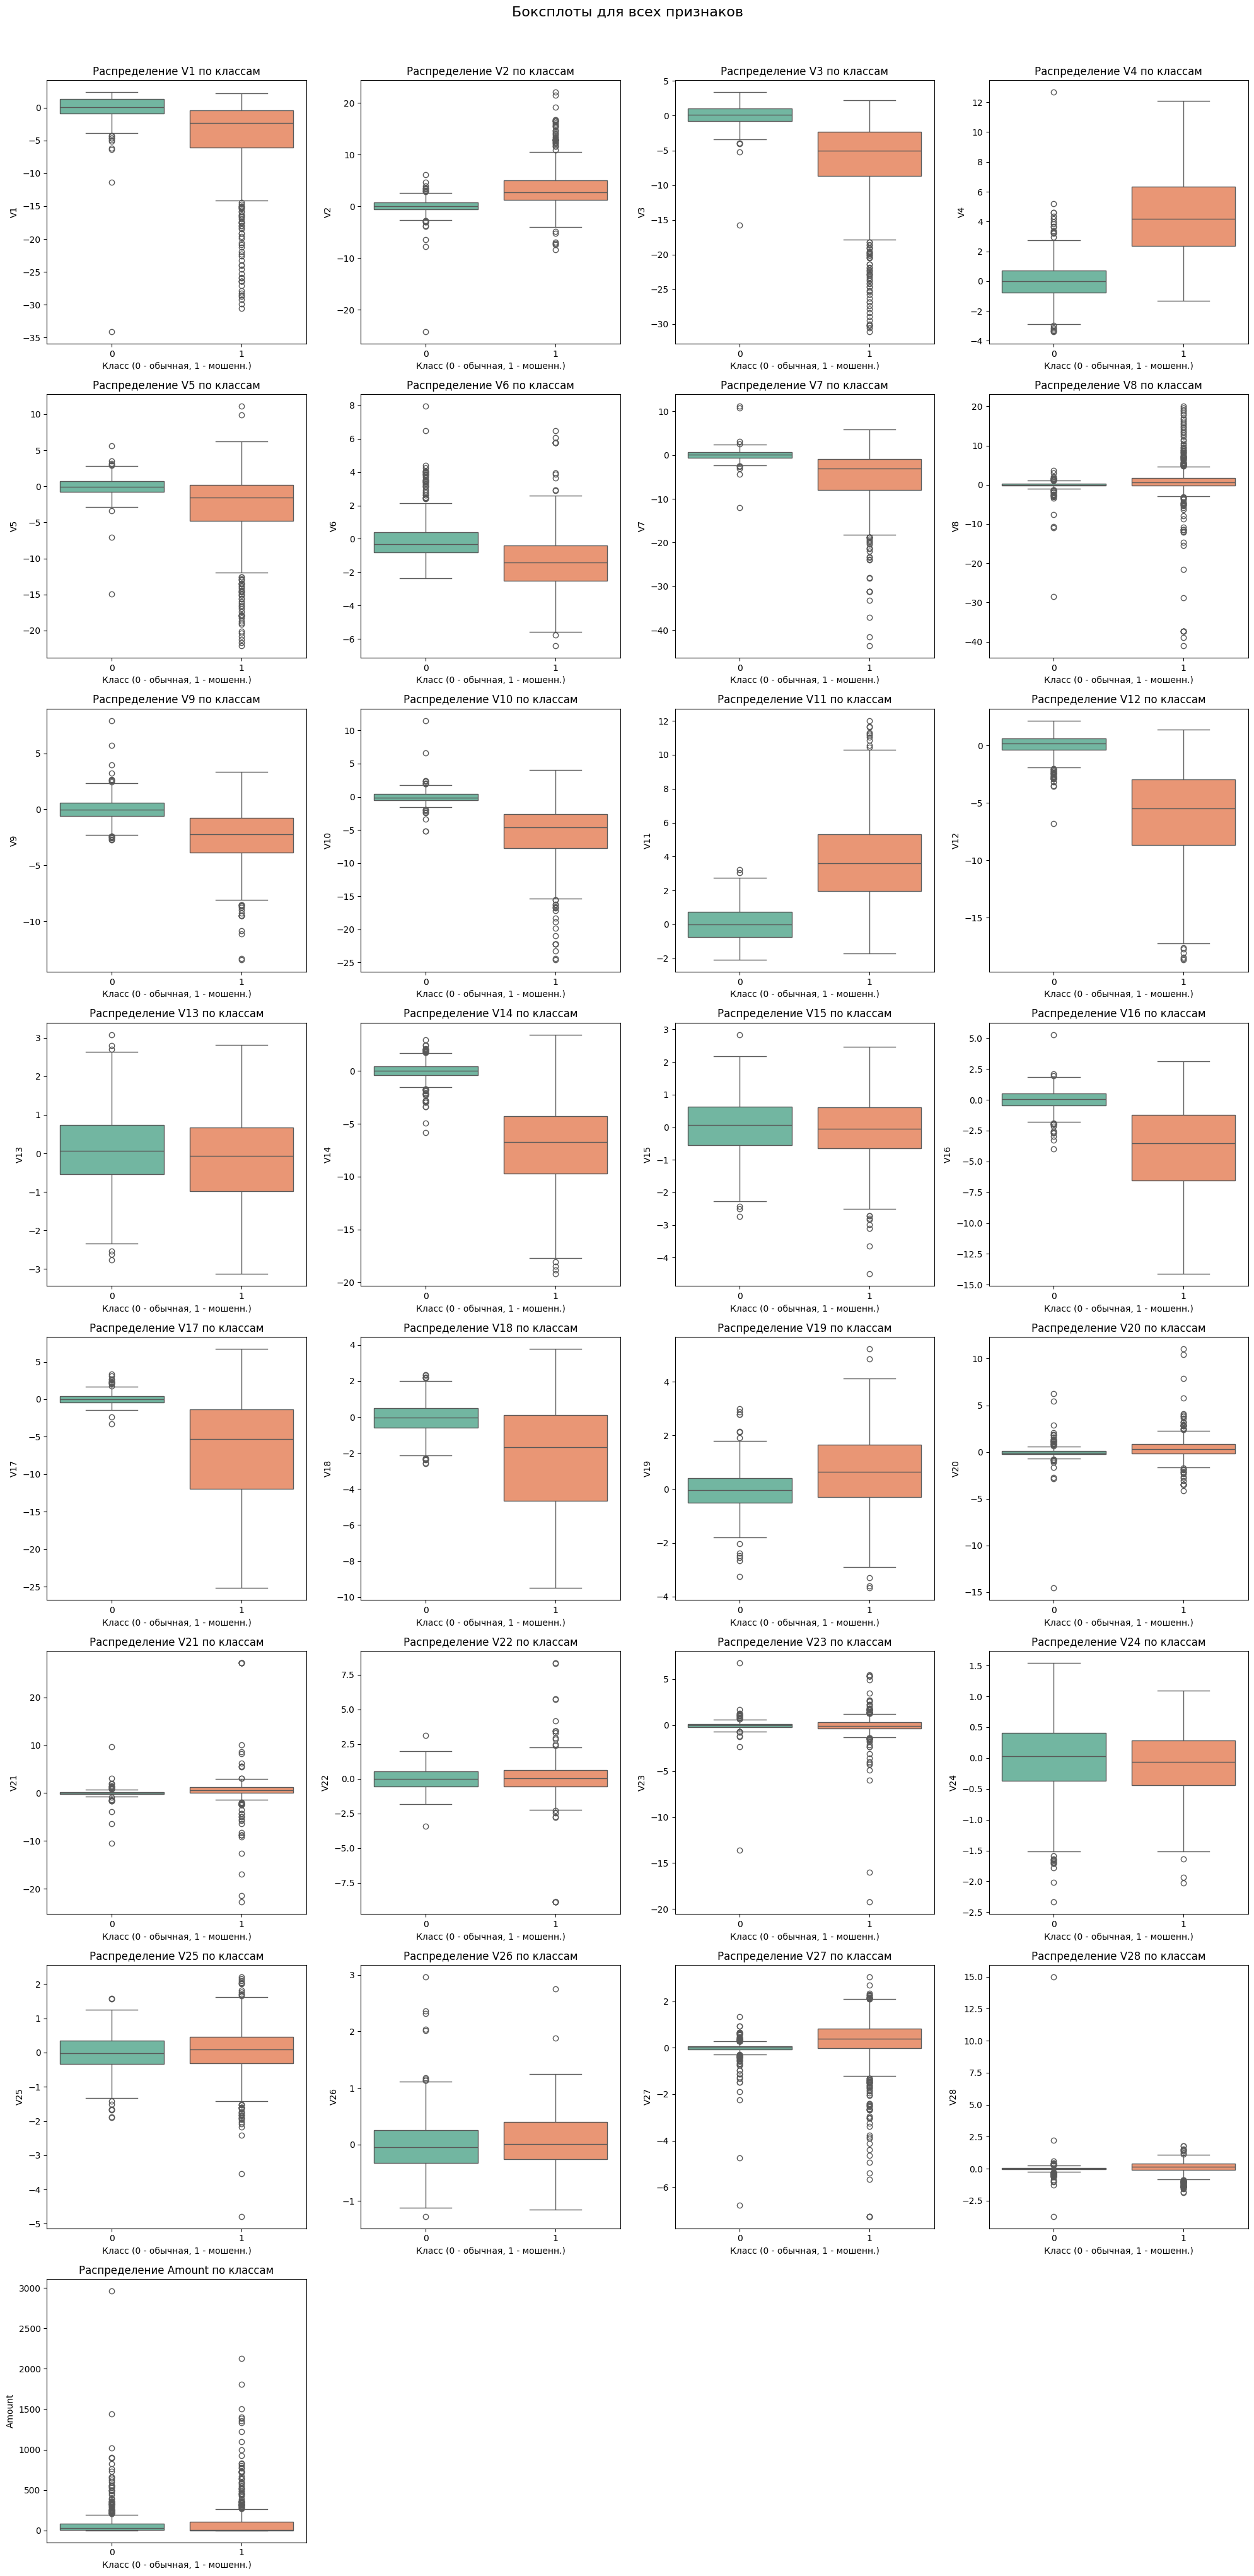

In [35]:
features = [col for col in new_df.columns if col not in ['target', 'Time', 'fraud_class']]

num_features = len(features)
num_cols = 4
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()


for i, feature in enumerate(features):
    sns.boxplot(x='target', hue='target', y=feature, data=new_df, ax=axes[i], palette='Set2', legend=False)
    axes[i].set_title(f'Распределение {feature} по классам')
    axes[i].set_xlabel('Класс (0 - обычная, 1 - мошенн.)')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.suptitle('Боксплоты для всех признаков', y=1.02, fontsize=16)
plt.show()

Заметим, что большинство фичей имеет много выбросов, поэтому попробуем в этот раз воспользоваться `RobustScaler`

In [37]:
X = new_df.drop(columns=[ 'target', 'fraud_class'])
y = new_df['target']
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values,
                                                    test_size=0.2, stratify=y,
                                                    random_state=42)

print(f"train size: {X_train.shape}")
print(f"test size: {X_test.shape}")
print(f"train class distribution: {np.bincount(y_train)}")
print(f"test class distribution: {np.bincount(y_test)}")

train size: (787, 30)
test size: (197, 30)
train class distribution: [393 394]
test class distribution: [99 98]


In [39]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()
X_train_scaled = rob_scaler.fit_transform(X_train)
X_test_scaled = rob_scaler.transform(X_test)

print("Пример до масштабирования (первые 3 признака):")
print(X_train[0, :3])
print("\nпример после масштабирования (первые 3 признака):")
print(X_train_scaled[0, :3])

Пример до масштабирования (первые 3 признака):
[ 1.24920000e+05  2.08584214e+00 -1.21906132e+00]

пример после масштабирования (первые 3 признака):
[ 0.49755961  0.76260248 -0.7211402 ]


## **Прогоним снова с разными значениями параметра C**

C=0.01: accuracy = 78.68%
C=0.1: accuracy = 88.32%
C=1: accuracy = 90.86%
C=10: accuracy = 94.42%
C=100: accuracy = 93.91%


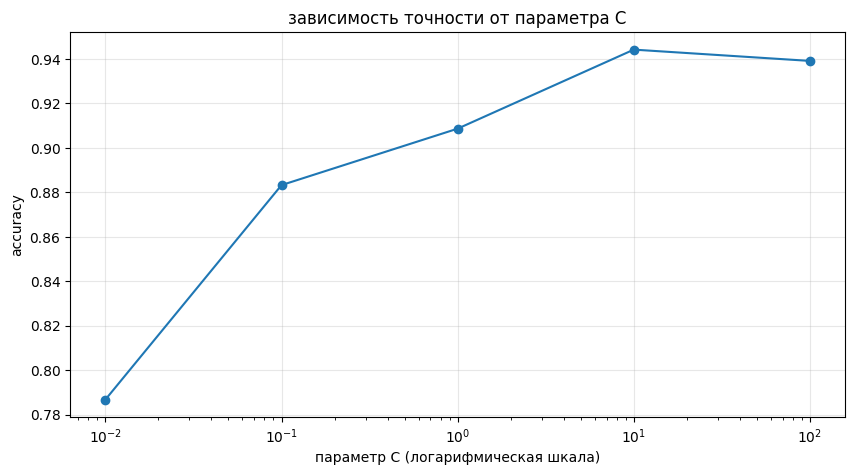

In [48]:
C_values = [0.01, 0.1, 1, 10, 100]
accuracies = []

for C in C_values:
    svm_temp = SVC(kernel='rbf', C=C, random_state=42)
    svm_temp.fit(X_train_scaled, y_train)
    acc = svm_temp.score(X_test_scaled, y_test)
    accuracies.append(acc)
    print(f"C={C}: accuracy = {acc:.2%}")

# график зависимости accuracy от C
plt.figure(figsize=(10, 5))
plt.plot(C_values, accuracies, marker='o')
plt.xscale('log')
plt.xlabel('параметр C (логарифмическая шкала)')
plt.ylabel('accuracy')
plt.title('зависимость точности от параметра C')
plt.grid(True, alpha=0.3)
plt.show()

## **Попробуем другое ядро и к параметру C добавим gamma**

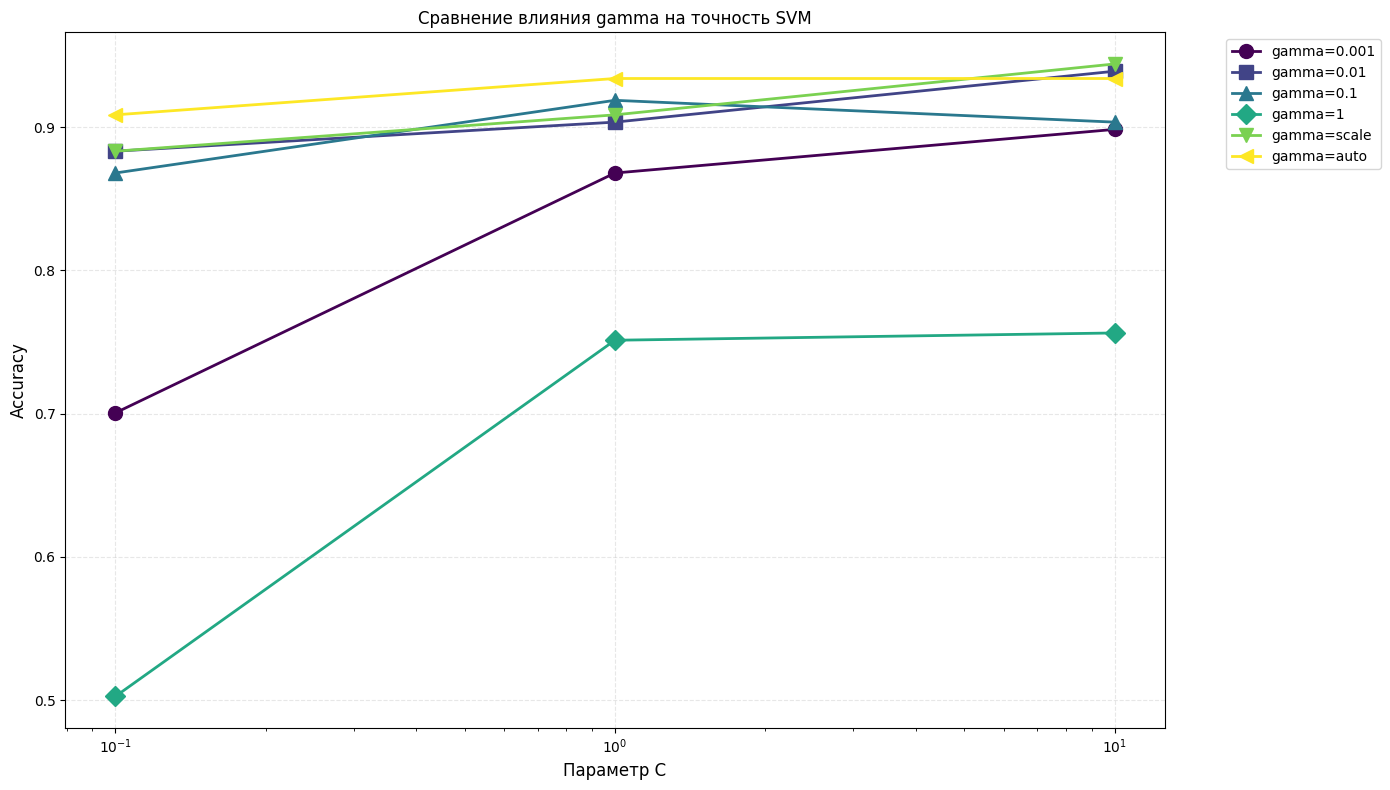

In [49]:
plt.figure(figsize=(14, 8))

C_values = [0.1, 1, 10]
gamma_values = [0.001, 0.01, 0.1, 1, 'scale', 'auto']  # разные значения gamma

# Разные маркеры для разных gamma
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']
colors = plt.cm.viridis(np.linspace(0, 1, len(gamma_values)))

for idx, gamma in enumerate(gamma_values):
    acc_for_gamma = []
    for C in C_values:
        svm_temp = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)
        svm_temp.fit(X_train_scaled, y_train)
        acc = svm_temp.score(X_test_scaled, y_test)
        acc_for_gamma.append(acc)

    plt.plot(C_values, acc_for_gamma,
             marker=markers[idx % len(markers)],
             linewidth=2,
             markersize=10,
             color=colors[idx],
             label=f'gamma={gamma}')

plt.xscale('log')
plt.xlabel('Параметр C', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Сравнение влияния gamma на точность SVM', fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

In [50]:
# используем найденные лучшие параметры
best_svm = SVC(kernel='rbf', C=10.0, gamma='scale', random_state=42)
best_svm.fit(X_train_scaled, y_train)

y_pred_best = best_svm.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"лучшая SVM accuracy: {accuracy_best:.2%}")
print("\nClassification report:")
print(classification_report(y_test, y_pred_best, target_names=target_names))

лучшая SVM accuracy: 94.42%

Classification report:
              precision    recall  f1-score   support

   not_fraud       0.91      0.99      0.95        99
       fraud       0.99      0.90      0.94        98

    accuracy                           0.94       197
   macro avg       0.95      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197



Метрики целевого класса (fraud) буквально взлетели, что не может не радовать. Особенно хорошо поднялся recall, что сигнализирует нам о том, что у модели явно повысилась чувствительность к нему (засчет баланса классов)

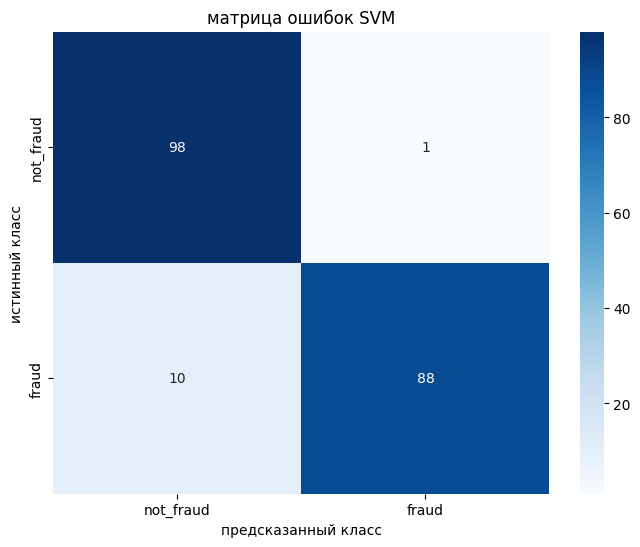

In [51]:
# вычисляем матрицу ошибок
cm = confusion_matrix(y_test, y_pred_best)

# визуализация
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('предсказанный класс')
plt.ylabel('истинный класс')
plt.title('матрица ошибок SVM')
plt.show()

In [56]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_best, average='weighted')
recall = recall_score(y_test, y_pred_best, average='weighted')
f1 = f1_score(y_test, y_pred_best, average='weighted')

print(f"Итоговые метрики:")
print(f"precision: {precision:.2%}")
print(f"recall:    {recall:.2%}")
print(f"F1-score:  {f1:.2%}")

Итоговые метрики:
precision: 94.79%
recall:    94.42%
F1-score:  94.40%


In [69]:
# находим индексы ошибок
error_indices = np.where(y_pred_best != y_test)[0]

print(f"количество ошибок: {len(error_indices)}")

if len(error_indices) > 0:
    print("\nпримеры ошибок:")

    for i, idx in enumerate(error_indices):  # покажем первые 3
        print(f"\nошибка {i+1}:")
        print(f"  истинный класс: {target_names[y_test[idx]]}")
        print(f"  предсказанный:  {target_names[y_pred_best[idx]]}")
        print(f"  отдаленность от разделяющей гиперплоскости: {best_svm.decision_function(X_test_scaled[idx:idx+1])}")

количество ошибок: 11

примеры ошибок:

ошибка 1:
  истинный класс: not_fraud
  предсказанный:  fraud
  отдаленность от разделяющей гиперплоскости: [1.74433506]

ошибка 2:
  истинный класс: fraud
  предсказанный:  not_fraud
  отдаленность от разделяющей гиперплоскости: [-0.72823027]

ошибка 3:
  истинный класс: fraud
  предсказанный:  not_fraud
  отдаленность от разделяющей гиперплоскости: [-0.69713231]

ошибка 4:
  истинный класс: fraud
  предсказанный:  not_fraud
  отдаленность от разделяющей гиперплоскости: [-0.11070128]

ошибка 5:
  истинный класс: fraud
  предсказанный:  not_fraud
  отдаленность от разделяющей гиперплоскости: [-0.6641268]

ошибка 6:
  истинный класс: fraud
  предсказанный:  not_fraud
  отдаленность от разделяющей гиперплоскости: [-0.44351741]

ошибка 7:
  истинный класс: fraud
  предсказанный:  not_fraud
  отдаленность от разделяющей гиперплоскости: [-1.46553535]

ошибка 8:
  истинный класс: fraud
  предсказанный:  not_fraud
  отдаленность от разделяющей гиперплос

Можно сказать, что в первом случае модель довольно сильно уверена в своем предсказании, так как значение растояния довольно велико по сравнения с остальными ошибками, но в этом случае это не так страшно, так как лучше определить немошенническую операцию к мошеннической, чем наоборот

Здесь мы можем более подробно посмотреть на распределение вероятностей классов в ошибочных случаях

In [68]:
best_svm = SVC(kernel='rbf', C=10, gamma='scale',
               probability=True,
               random_state=42)
best_svm.fit(X_train_scaled, y_train)

y_pred_best = best_svm.predict(X_test_scaled)

error_indices = np.where(y_pred_best != y_test)[0]

print(f"количество ошибок: {len(error_indices)}")

if len(error_indices) > 0:
    print("\nпримеры ошибок:")

    for i, idx in enumerate(error_indices):
        print(f"\nошибка {i+1}:")
        print(f"  истинный класс: {target_names[y_test[idx]]}")
        print(f"  предсказанный:  {target_names[y_pred_best[idx]]}")

        proba = best_svm.predict_proba(X_test_scaled[idx:idx+1])[0]

        print(f"  вероятности классов:")
        for j, class_name in enumerate(target_names):
            print(f"    {class_name}: {proba[j]:.2}")

количество ошибок: 11

примеры ошибок:

ошибка 1:
  истинный класс: not_fraud
  предсказанный:  fraud
  вероятности классов:
    not_fraud: 0.014
    fraud: 0.99

ошибка 2:
  истинный класс: fraud
  предсказанный:  not_fraud
  вероятности классов:
    not_fraud: 0.81
    fraud: 0.19

ошибка 3:
  истинный класс: fraud
  предсказанный:  not_fraud
  вероятности классов:
    not_fraud: 0.8
    fraud: 0.2

ошибка 4:
  истинный класс: fraud
  предсказанный:  not_fraud
  вероятности классов:
    not_fraud: 0.51
    fraud: 0.49

ошибка 5:
  истинный класс: fraud
  предсказанный:  not_fraud
  вероятности классов:
    not_fraud: 0.79
    fraud: 0.21

ошибка 6:
  истинный класс: fraud
  предсказанный:  not_fraud
  вероятности классов:
    not_fraud: 0.69
    fraud: 0.31

ошибка 7:
  истинный класс: fraud
  предсказанный:  not_fraud
  вероятности классов:
    not_fraud: 0.96
    fraud: 0.042

ошибка 8:
  истинный класс: fraud
  предсказанный:  not_fraud
  вероятности классов:
    not_fraud: 0.92
 

Теперь мы можем сопоставить вероятности и расстояния. Очень пограничными являются ошбки 4 и 10. Если мы обратим внимание на расстояние от разделяющей гиперплоскости, то оно так же довольно мало (`[-0.11070128] [-0.00953793]`, соответсвенно)

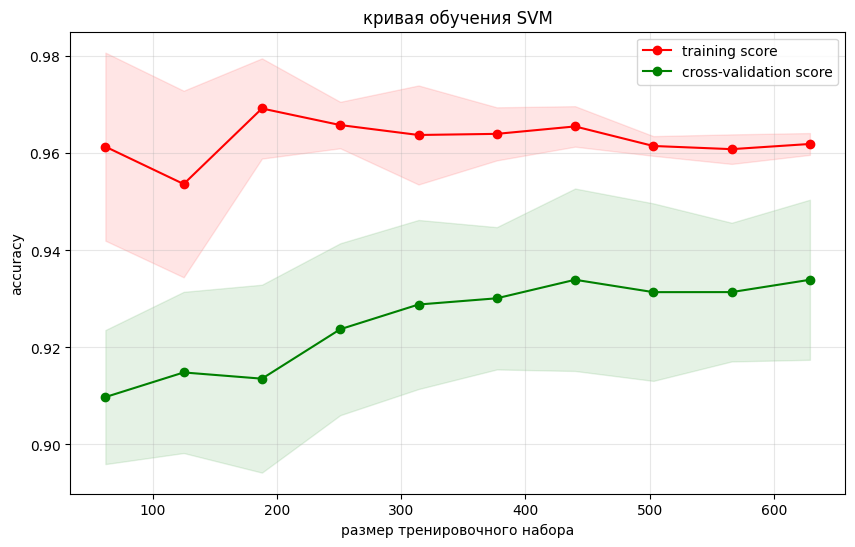

In [66]:
from sklearn.model_selection import learning_curve

# вычисляем learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_svm, X_train_scaled, y_train, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# средние значения
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# график
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='training score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
plt.xlabel('размер тренировочного набора')
plt.ylabel('accuracy')
plt.title('кривая обучения SVM')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.show()

Можно сказать, что кривые близки к схождению и в принципе каждая из них постепенно выходит на плато, но для того, чтобы уверенно говорить об этом, стоит попробовать oversampling для нашего минорного класса, чтобы увеличить набор сбалансированных даных.

Перспективы и общие выводы:

- Для будущих экспериментов я бы попробовала:
  - минимизировать выбросы их удалением, так как у нас довольно большой датасет и мы можем себе позволить удаление нескольких тысяч примеров.
  - аугментация минорного класса маст хэв;
- Accuracy плохой показатель для моделей, обучающихся на несбалансированных данных, вводит в заблуждение, выводя высокие проценты, полученные от верно опрделеенных тысяч примеров нецелевого класса против нескольких дестяков ошибок в минорном классе  